# クラスタリング

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

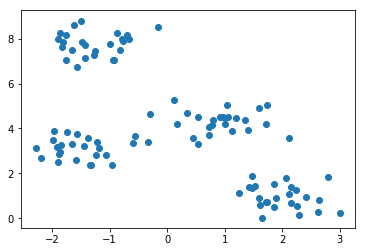

In [3]:
plt.scatter(X[:,0], X[:, 1]);

## 目的関数
$ SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2 $ 

## サンプル

In [4]:
col = 2
k = 2
centroids = np.random.randn(k,col)

In [5]:
a= np.array([[2,2],[3,4],[5,6],[7,8]])
centroids = np.array([[1,2],[3,4]])

In [6]:
centroids

array([[1, 2],
       [3, 4]])

In [7]:
# ３次元に拡張してから、サンプルから中心点を引く
np.tile(a,(2,1,1)) - centroids[:, np.newaxis]

array([[[ 1,  0],
        [ 2,  2],
        [ 4,  4],
        [ 6,  6]],

       [[-1, -2],
        [ 0,  0],
        [ 2,  2],
        [ 4,  4]]])

## 距離の計算方法

In [8]:
# np.linalg.normを使わない方法1
%timeit np.sqrt(np.sum(np.power(np.tile(a,(2,1,1)) - centroids[:, np.newaxis],2),axis=2))

12.7 µs ± 422 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
# np.linalg.normを使わない方法1
%timeit np.sqrt(np.sum((np.tile(a,(2,1,1)) - centroids[:, np.newaxis])**2,axis=2))

12.9 µs ± 655 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [10]:
# np.linalg.normを使う方法
%timeit np.linalg.norm(np.tile(a,(2,1,1)) - centroids[:, np.newaxis], axis=2)

14.4 µs ± 634 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


np.linalg.normが速い

In [11]:
d=np.linalg.norm(np.tile(a,(2,1,1)) - centroids[:, np.newaxis], axis=2)
d

array([[1.        , 2.82842712, 5.65685425, 8.48528137],
       [2.23606798, 0.        , 2.82842712, 5.65685425]])

In [12]:
# もっとも距離の近いクラスタを取ってくる
np.argmin(d, axis=0)

array([0, 1, 1, 1])

In [13]:
# 少ないサンプルでやってみる
col = 2
k = 2
eta = 10
# centroids = np.random.randn(k,col)

a= np.array([[2,2],[3,4],[5,6],[7,8]])
centroids = np.array([[1,2],[3,4]])
for _ in range(eta):
    distance = np.linalg.norm(np.tile(a,(2,1,1)) - centroids[:, np.newaxis], axis=2)
    cls_member = np.argmin(distance, axis=0)
    print(distance)
    print(cls_member)

    for i in range(k):
        if i not in cls_member:
            continue
        centroids[i] = np.average(a[np.where(cls_member==i)[0]])
    label_encode = np.zeros((a.shape[0],k))
    label_encode[np.arange(len(cls_member)), cls_member] = 1
    sse = np.sum(distance * label_encode.T)
    print(sse)
    
print(centroids)

[[1.         2.82842712 5.65685425 8.48528137]
 [2.23606798 0.         2.82842712 5.65685425]]
[0 1 1 1]
9.485281374238571
[[0.         2.23606798 5.         7.81024968]
 [4.24264069 2.23606798 1.         3.60555128]]
[0 0 1 1]
6.841619252963779
[[0.         2.23606798 5.         7.81024968]
 [5.65685425 3.60555128 1.         2.23606798]]
[0 0 1 1]
5.47213595499958
[[0.         2.23606798 5.         7.81024968]
 [5.65685425 3.60555128 1.         2.23606798]]
[0 0 1 1]
5.47213595499958
[[0.         2.23606798 5.         7.81024968]
 [5.65685425 3.60555128 1.         2.23606798]]
[0 0 1 1]
5.47213595499958
[[0.         2.23606798 5.         7.81024968]
 [5.65685425 3.60555128 1.         2.23606798]]
[0 0 1 1]
5.47213595499958
[[0.         2.23606798 5.         7.81024968]
 [5.65685425 3.60555128 1.         2.23606798]]
[0 0 1 1]
5.47213595499958
[[0.         2.23606798 5.         7.81024968]
 [5.65685425 3.60555128 1.         2.23606798]]
[0 0 1 1]
5.47213595499958
[[0.         2.2360679

In [14]:
distance

array([[0.        , 2.23606798, 5.        , 7.81024968],
       [5.65685425, 3.60555128, 1.        , 2.23606798]])

In [15]:
i = np.zeros((a.shape[0],k))
i

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [16]:
i[np.arange(len(cls_member)), cls_member] = 1
i

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [17]:
distance

array([[0.        , 2.23606798, 5.        , 7.81024968],
       [5.65685425, 3.60555128, 1.        , 2.23606798]])

In [18]:
distance * i.T

array([[0.        , 2.23606798, 0.        , 0.        ],
       [0.        , 0.        , 1.        , 2.23606798]])

In [19]:
np.sum(distance * i.T)

5.47213595499958

In [20]:
np.array([0,1,1,1])+1

array([1, 2, 2, 2])

In [21]:
j = np.array([1,2,3,4,4,1])+1
np.eye(5+1)[j]

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]])

In [22]:
target_vector = [0,2,1,3,4]               # クラス分類を整数値のベクトルで表現したもの
n_labels = len(np.unique(target_vector))  # 分類クラスの数 = 5
np.eye(n_labels)[target_vector]           # one hot表現に変換

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

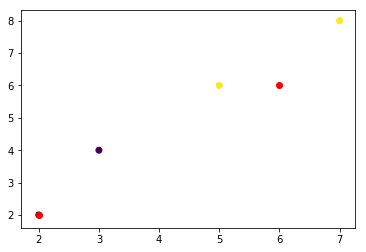

In [23]:
plt.scatter(a[:,0], a[:, 1], c=cls_member);
plt.scatter(centroids[:,0],centroids[:,1], c='r');

In [24]:
a[np.where(cls_member==1)[0]]

array([[5, 6],
       [7, 8]])

In [25]:
# 実際のサンプルでクラスタリングする
col = 2
k = 4
eta = 1000
tol = 1e-4

centroids = np.random.randn(k, col)
for _ in range(eta):
    distance = np.linalg.norm(np.tile(X,(k,1,1)) - centroids[:, np.newaxis], axis=2)
    labels = np.argmin(distance, axis=0)
    for i in range(k):
        before_centroid =  centroids.copy()
        if i not in labels:
            centroids[i] = X[np.argmax(distance[i])]
            continue
        
        centroids[i] = np.mean(X[np.where(labels==i)[0]],axis=0)
        
    if np.all(np.abs(centroids-before_centroid)<tol):
        break

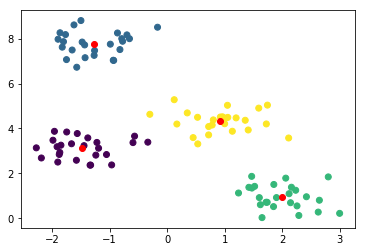

In [26]:
plt.scatter(X[:,0], X[:, 1], c=labels);
plt.scatter(centroids[:,0],centroids[:,1], c='r');

In [27]:
a = range(5)
list(a)

[0, 1, 2, 3, 4]

264.23375429919713
185.137914003397
103.8436210515425
99.74085667810772
59.85668577865749
[264.2337543  185.137914   103.84362105  99.74085668  59.85668578]


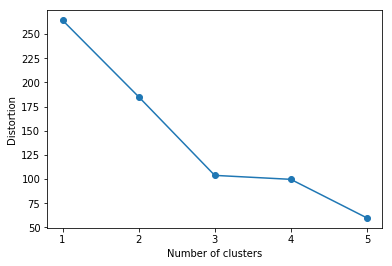

In [28]:
# 実際のサンプルでクラスタリングする
col = 2
k = 5
eta = 1000
tol = 1e-4
sse = np.empty(k)
for clus in range(1,k+1):
    centroids = np.random.randn(clus, col)
    for _ in range(eta):
        distance = np.linalg.norm(np.tile(X,(clus,1,1)) - centroids[:, np.newaxis], axis=2)
        labels = np.argmin(distance, axis=0)
        for i in range(clus):
            before_centroid =  centroids.copy()
            if i not in labels:
                centroids[i] = X[np.argmax(distance[i])]
                continue

            centroids[i] = np.mean(X[np.where(labels==i)[0]],axis=0)

        if np.all(np.abs(centroids-before_centroid)<tol):
            break

    label_encode = np.zeros((X.shape[0],clus))
    label_encode[np.arange(X.shape[0]), labels] = 1
    sse[clus-1] = np.sum(distance * label_encode.T)
    print(sse[clus-1])
print(sse)
plt.plot(list(range(1,k+1)),sse,marker='o')
plt.xticks(list(range(1,k+1)))
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## クラス化してみる

In [94]:
class ScratchKmeans():
    def __init__(self,k=4, eta=10000, tol=1e-4):
        self.eta = eta
        self.tol = tol
        self.k = k
        
    def fit(self, X):
        self.centroids = np.random.randn(self.k, X.shape[1])
        
        for _ in range(self.eta):
            self.distance = np.linalg.norm(np.tile(X,(self.k,1,1)) - self.centroids[:, np.newaxis], axis=2)
            self.labels = np.argmin(self.distance, axis=0)
            
            for i in range(self.k):
                before_centroid =  self.centroids.copy()
                
                if i not in self.labels:
                    self.centroids[i] = X[np.argmax(self.distance[i])]
                    continue
                    
                self.centroids[i] = np.mean(X[np.where(self.labels==i)[0]],axis=0)
            if np.all(np.abs(self.centroids-before_centroid) < self.tol):
                break
                
    def plot(self,classes=4):
        self.sse_score = np.empty(classes)
        for clus in range(1,classes+1):
            centroids = np.random.randn(clus, col)
            kmeans = ScratchKmeans(k=clus)
            kmeans.fit(X)
            
            self.sse_score[clus-1] = kmeans.sse()
        print(self.sse_score)
        fig, ax = plt.subplots(1,2, figsize=(20,5))

        ax[0].set_title('Kmeans(k={})'.format(self.k))
        ax[0].scatter(X[:,0], X[:, 1], c=self.labels)
        ax[0].scatter(self.centroids[:,0], self.centroids[:,1], c='r')
        ax[1].set_title('Elbow')
        ax[1].plot(list(range(1,classes+1)),self.sse_score,marker='o')
        ax[1].set_xticks(list(range(1,classes+1)))
        
    def sse(self):
        label_encode = np.zeros((X.shape[0],self.k))
        label_encode[np.arange(X.shape[0]), self.labels] = 1
        score = np.sum(self.distance * label_encode.T)
        return score

In [98]:
kmeans=ScratchKmeans()

In [99]:
kmeans.fit(X)

[264.2337543  169.51988742 103.63271392  99.80887826  59.09886672
  55.60103672  56.12825383]


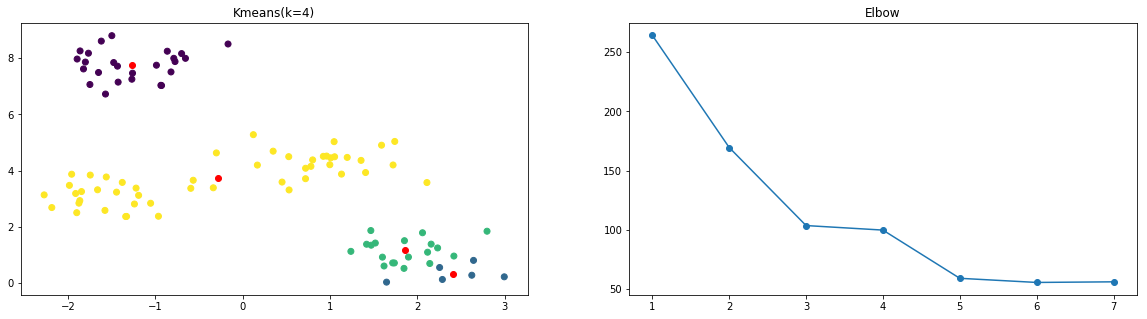

In [100]:
kmeans.plot(classes=7)

In [ ]:
kmeans.centroids

In [ ]:
kmeans.labels

In [80]:
kmeans.centroids

array([[-0.3255195 ,  3.72390954],
       [ 1.84900694,  1.68295352],
       [-1.26811733,  7.76378266],
       [ 2.10458645,  0.61362557]])

## Sklearnとの比較

In [91]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init="random").fit(X)

In [92]:
kmeans.labels_

array([1, 2, 1, 1, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 0, 1, 2,
       3, 0, 1, 3, 3, 1, 0, 0, 0, 2, 0, 0, 3, 1, 2, 0, 2, 3, 1, 3, 2, 3,
       3, 2, 0, 3, 1, 1, 1, 0, 3, 3, 3, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2,
       3, 3, 0, 1, 2, 0, 1, 2, 1, 1, 3, 3, 0, 0, 0, 2, 3, 1, 0, 3, 0, 0,
       1, 1, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1], dtype=int32)

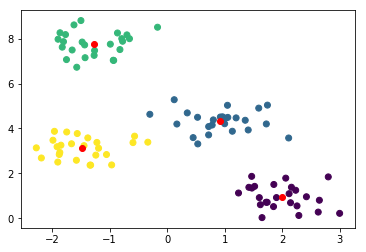

In [93]:
plt.scatter(X[:,0], X[:, 1], c=kmeans.labels_);
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='r');

## 実験中&TODO

- 別解

In [41]:
centroids = np.random.randn(k, a.shape[0])
distance = np.random.randn(k, a.shape[0])
for _ in range(eta):
    
    for i,center in enumerate(centroids):
        diff = a - center
        distance[i] = np.linalg.norm(diff,axis=1)
        print(distance)
    centroids[i] = 
        
    cls_member = np.argmin(distance, axis=0) 

SyntaxError: invalid syntax (<ipython-input-41-463261a63ed5>, line 9)

In [42]:
np.argmax(np.array([[1,2,3],
                    [5,4,3],
                   [6,1,5]]),axis=0)

array([2, 1, 2])

In [43]:
col = 2
k = 2
centroids = np.random.randn(k,col)
dist_list = np.random.randn(X.shape[0])
d_centroid_list = []
for sample in range(X.shape[0]):
    d_centroid1 = np.linalg.norm(sample-centroids[0])
    d_centroid2 = np.linalg.norm(sample-centroids[1])
    d_centroid = [d_centroid1, d_centroid2]
    d_centroid_list.append(d_centroid)
#     print(np.argmax(d_centroid))
center_label = np.array(d_centroid_list).argmax(axis=1)
# unique, count = np.unique(center_label, return_counts=True)
# centroids[0] = np.sum(X[np.where(np.unique(center_label)[0])])/(count[0] if center_ else 1)
# print(centroids[0])
# centroids[1] = np.sum(X[np.where(np.unique(center_label)[1])])/count[1] if np.unique(center_label)!=None else 1)

In [44]:
unique, count = np.unique(center_label, return_counts=True)
centroids[0] = np.sum(X[np.where(0)])/(count[0] if 0 in center_label else 1)
print(centroids[0])
centroids[1] = np.sum(X[np.where(1)])/(count[1] if 0&1 in center_label else count[0] if 1 in center_label else 1)
print(centroids[1])

[0. 0.]
[0.04571483 0.04571483]


In [45]:
eta = 3
col = 2
k = 2
centroids = np.empty((k,col))
dist_list = np.empty(X.shape[0])
# fig, ax = plt.subplots(50,1,figsize=(10,500))
for _ in range(eta):
    d_centroid_list = []
    for sample in range(X.shape[0]):
        d_centroid1 = np.linalg.norm(sample-centroids[0])
        d_centroid2 = np.linalg.norm(sample-centroids[1])
        d_centroid = [d_centroid1, d_centroid2]
        d_centroid_list.append(d_centroid)
    #     print(np.argmax(d_centroid))
    center_label = np.array(d_centroid_list).argmax(axis=1)
    unique, count = np.unique(center_label, return_counts=True)
    centroids[0] = np.sum(X[np.where(center_label==0)],axis=0)/(count[0] if 0 in center_label else 1)
    print(centroids[0])
    centroids[1] = np.sum(X[np.where(center_label==1)],axis=0)/(count[1] if 0&1 in center_label else count[0] if 1 in center_label else 1)
#     print(centroids[1])
#     print(centroids)

[-0.18986779  3.92858815]
[0.05539083 4.00612806]
[0.0366827  3.94492709]


In [15]:
eta = 100
col = 2
k = 2
centroids = np.empty((k,col))
for _ in range(eta):
    d_centroid_list = []
    for sample in range(X.shape[0]):
        d_centroid1 = np.linalg.norm(sample-centroids[0])
        d_centroid2 = np.linalg.norm(sample-centroids[1])
        d_centroid = [d_centroid1, d_centroid2]
        d_centroid_list.append(d_centroid)
    #     print(np.argmax(d_centroid))
    center_label = np.array(d_centroid_list).argmax(axis=1)
    unique, count = np.unique(center_label, return_counts=True)
    if unique.shape[0]==k:
        centroids[0] = np.sum(X[np.where(center_label==0)],axis=0)/count[0]
        centroids[1] = np.sum(X[np.where(center_label==1)],axis=0)/count[1]
        
    elif 0 in center_label:
        centroids[0] = np.sum(X[np.where(center_label==0)],axis=0)/count[0]
        centroids[1] = 0
        
    else:
        centroids[0] = 0
        centroids[1] = np.sum(X[np.where(center_label==1)],axis=0)/count[0]
        
    
pred_centroid_list = []
for sample in range(X.shape[0]):
    pred_centroid1 = np.linalg.norm(sample-centroids[0])
    pred_centroid2 = np.linalg.norm(sample-centroids[1])
    pred_centroid = [pred_centroid1, pred_centroid2]
    pred_centroid_list.append(pred_centroid)
pred_label = np.array(pred_centroid_list).argmax(axis=1)
print(pred_label)

[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


- TODO:k-means++の実装

- n_init